<a href="https://colab.research.google.com/github/EdiVilleda/Edi/blob/main/Edison_Villeda_Salinas_801065154_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework 1 by Edison Villeda-Salinas**

https://github.com/EdiVilleda/Edi.git

**Problem 1**

In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer

In [59]:
diabetes_df = pd.read_csv("diabetes.csv")

In [60]:
X = diabetes_df.iloc[:, :-1]
y = diabetes_df.iloc[:, -1]
print(X[:5])
print(y[:5])


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  
0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64


In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

In [63]:
print("Accuracy: {:.2f}%".format(accuracy*100))
print("Precision: {:.2f}%".format(precision*100))
print("Recall: {:.2f}%".format(recall*100))

conf_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_mat)

Accuracy: 75.32%
Precision: 64.91%
Recall: 67.27%
Confusion Matrix:
 [[79 20]
 [18 37]]


Text(0.5, 257.44, 'Predicted label')

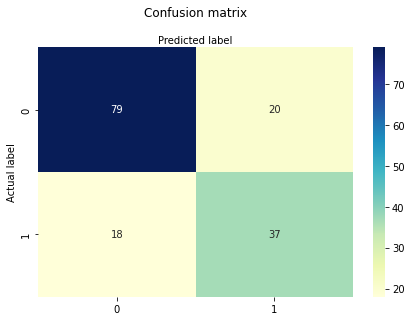

In [64]:
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(conf_mat), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

**Problem 2**

In [65]:
diabetes_df = pd.read_csv("diabetes.csv")

In [66]:
X = diabetes_df.iloc[:, :-1]
y = diabetes_df.iloc[:, -1]

scaler = StandardScaler()
X = scaler.fit_transform(X)


kf_5 = KFold(n_splits=5, shuffle=True, random_state=42)
kf_10 = KFold(n_splits=10, shuffle=True, random_state=42)


log_reg = LogisticRegression()

scores_5 = cross_val_score(log_reg, X, y, cv=kf_5)

print("Average accuracy with k=5: {:.2f}%".format(scores_5.mean()*100))

scores_10 = cross_val_score(log_reg, X, y, cv=kf_10)

print("Average accuracy with k=10: {:.2f}%".format(scores_10.mean()*100))

Accuracy scores with k=5:  [0.75324675 0.78571429 0.75324675 0.80392157 0.74509804]
Average accuracy with k=5: 76.82%
Accuracy scores with k=10:  [0.7012987  0.80519481 0.72727273 0.84415584 0.83116883 0.67532468
 0.85714286 0.77922078 0.71052632 0.77631579]
Average accuracy with k=10: 77.08%


**Problem 3 (a)**

In [67]:
breast = load_breast_cancer()
X = breast.data
print(X.shape)
y = breast.target
print(y)

(569, 30)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 

In [68]:
breast_input = pd.DataFrame(X)
breast_input.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)


y_pred = log_reg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

In [70]:
print("Accuracy: {:.2f}%".format(accuracy*100))
print("Precision: {:.2f}%".format(precision*100))
print("Recall: {:.2f}%".format(recall*100))

conf_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_mat)

Accuracy: 97.37%
Precision: 97.22%
Recall: 98.59%
Confusion Matrix:
 [[41  2]
 [ 1 70]]


Text(0.5, 257.44, 'Predicted label')

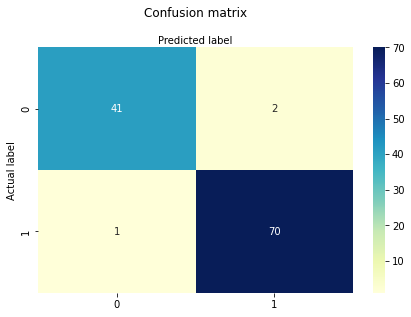

In [71]:
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(conf_mat), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

**Problem 3 (b)**

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

log_reg = LogisticRegression(penalty='l2', solver='liblinear', C=0.1)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

In [73]:
print("Accuracy: {:.2f}%".format(accuracy*100))
print("Precision: {:.2f}%".format(precision*100))
print("Recall: {:.2f}%".format(recall*100))

conf_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_mat)

Accuracy: 99.12%
Precision: 98.61%
Recall: 100.00%
Confusion Matrix:
 [[42  1]
 [ 0 71]]


Text(0.5, 257.44, 'Predicted label')

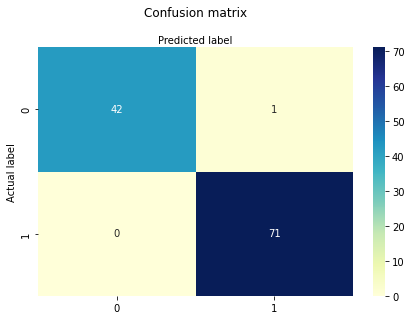

In [74]:
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(conf_mat), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

**Problem 4 (a)**

In [75]:
breast = load_breast_cancer()
X = breast.data
y = breast.target

scaler = StandardScaler()
X = scaler.fit_transform(X)

kf_5 = KFold(n_splits=5, shuffle=True, random_state=42)
kf_10 = KFold(n_splits=10, shuffle=True, random_state=42)

log_reg = LogisticRegression()

scores_5 = cross_val_score(log_reg, X, y, cv=kf_5)

print("Average accuracy with k=5: {:.2f}%".format(scores_5.mean()*100))


scores_10 = cross_val_score(log_reg, X, y, cv=kf_10)

print("Average accuracy with k=10: {:.2f}%".format(scores_10.mean()*100))

Accuracy scores with k=5:  [0.97368421 0.98245614 0.96491228 0.99122807 0.97345133]
Average accuracy with k=5: 97.71%
Accuracy scores with k=10:  [0.98245614 0.98245614 0.98245614 0.98245614 0.98245614 0.92982456
 1.         0.98245614 0.94736842 0.98214286]
Average accuracy with k=10: 97.54%


**Problem 4 (b)**

In [78]:
breast = load_breast_cancer()
X = breast.data
y = breast.target

scaler = StandardScaler()
X = scaler.fit_transform(X)

kf_5 = KFold(n_splits=5, shuffle=True, random_state=42)
kf_10 = KFold(n_splits=10, shuffle=True, random_state=42)

log_reg = LogisticRegression(penalty='l2', solver='liblinear', C=0.1)

scores_5 = cross_val_score(log_reg, X, y, cv=kf_5)

print("Average accuracy with k=5: {:.2f}%".format(scores_5.mean()*100))

scores_10 = cross_val_score(log_reg, X, y, cv=kf_10)

print("Average accuracy with k=10: {:.2f}%".format(scores_10.mean()*100))

Average accuracy with k=5: 98.06%
Average accuracy with k=10: 98.24%
